<h1 style ="text-align:center"> CSC 3220-001 </h1>
<h2 style ="text-align:center"> Exploratory Data Analysis: Netflix Recommender System </h2>
<h3 style ="text-align:center"> 11/22/2022 </h3>
<h4 style ="text-align:center"> Antonio Brown </h4>
<h4 style ="text-align:center"> Cade Kennedy </h4>
<h4 style ="text-align:center"> Christine Ong </h4>
<h4 style ="text-align:center"> Daniel Harnden </h4>
<h4 style ="text-align:center"> Shelby Smith </h4>

---

# Summary

In this Exploratory Analysis we will find patterns and relationships to use for reference when creating our Netflix movie recomendation system.

# Data Sources

Below we import the tools we need to work with the data such as:
        
        - pandas - for data analysis and manipulation
        - numpy - for working with arrays
        - matplotlib.pyplot - for interactive plots and simple cases of programmatic plot generation
        - searborn - for data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Below we read the cvs data we will be using in this report:
        
        - netflix1.csv 
               - https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows
        - Netflix_Dataset_Movie.csv
        - Netflix_Dataset_Rating.csv
               - https://www.kaggle.com/datasets/rishitjavia/netflix-movie-rating-dataset

In [2]:
df = pd.read_csv("netflix1.csv")
df2 = pd.read_csv("Netflix_Dataset_Movie.csv")
df3 = pd.read_csv("Netflix_Dataset_Rating.csv")

# Exploratory Analysis

### Checking for Null Values

Below we check to see if the dataframe containing "netflix1.csv" has any null values

In [3]:
df[df.isnull()].count()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Below we check to see if the dataframe containing "Netflix_Dataset_Movie.csv" has any null values

In [4]:
df2[df2.isnull()].count()

Movie_ID    0
Year        0
Name        0
dtype: int64

Below we check to see if the dataframe containing "Netflix_Dataset_Rating.csv" has any null values

In [5]:
df3[df3.isnull()].count()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

We determine that none of the dataframes have null values, and we have chosen to continues on to merging th dataframes in order to see the relationships between all of the data.

### Merging the Dataframes

To start we merge the df2 and df3 dataframes containing "Netflix_Dataset_Movie.csv" and "Netflix_Dataset_Rating.csv" respectivly.

In [6]:
df_ratings = df2.merge(df3)

Next we merge the df_ratings dataframe from above, with the df dataframe containing "netflix1.csv" data, but first we change the names of the df_ratings columns to the ones that match the netflix rating to allow them to merge successfully.

In [7]:
df_ratings = df_ratings.rename(columns={"Name": "title", "Rating": "user_rating"})
df = pd.merge(df, df_ratings)

### Manipulating Data

Next we change Type to a Nominal variable "is_movie" where 0 is not a movie and 1 is a movie.

In [8]:
df["is_movie"] = [1 if i=="Movie" else 0 for i in df["type"]]


Next we convert the first item in "listed_in" to a new column "genres", we keep the first one because we assume it is the most important.

In [9]:
list_genres = []
for i in range(len(df)):
    list_genres.append(df["listed_in"].iloc[i].split(", ")[0])
df["genres"] = pd.Series(list_genres)

Next we remove the minutes units from all movies and remove times from anything not labled as a movie.

In [10]:
duration = []
for i in range(len(df)):
    if df["is_movie"].iloc[i]==1:
        duration.append(int(df["duration"].iloc[i][:-4]))
    else:
        duration.append(1)
df["duration"] = pd.Series(duration)

### Frequency Distributions

## NOTE: Label all these graphs please Daniel and Cade

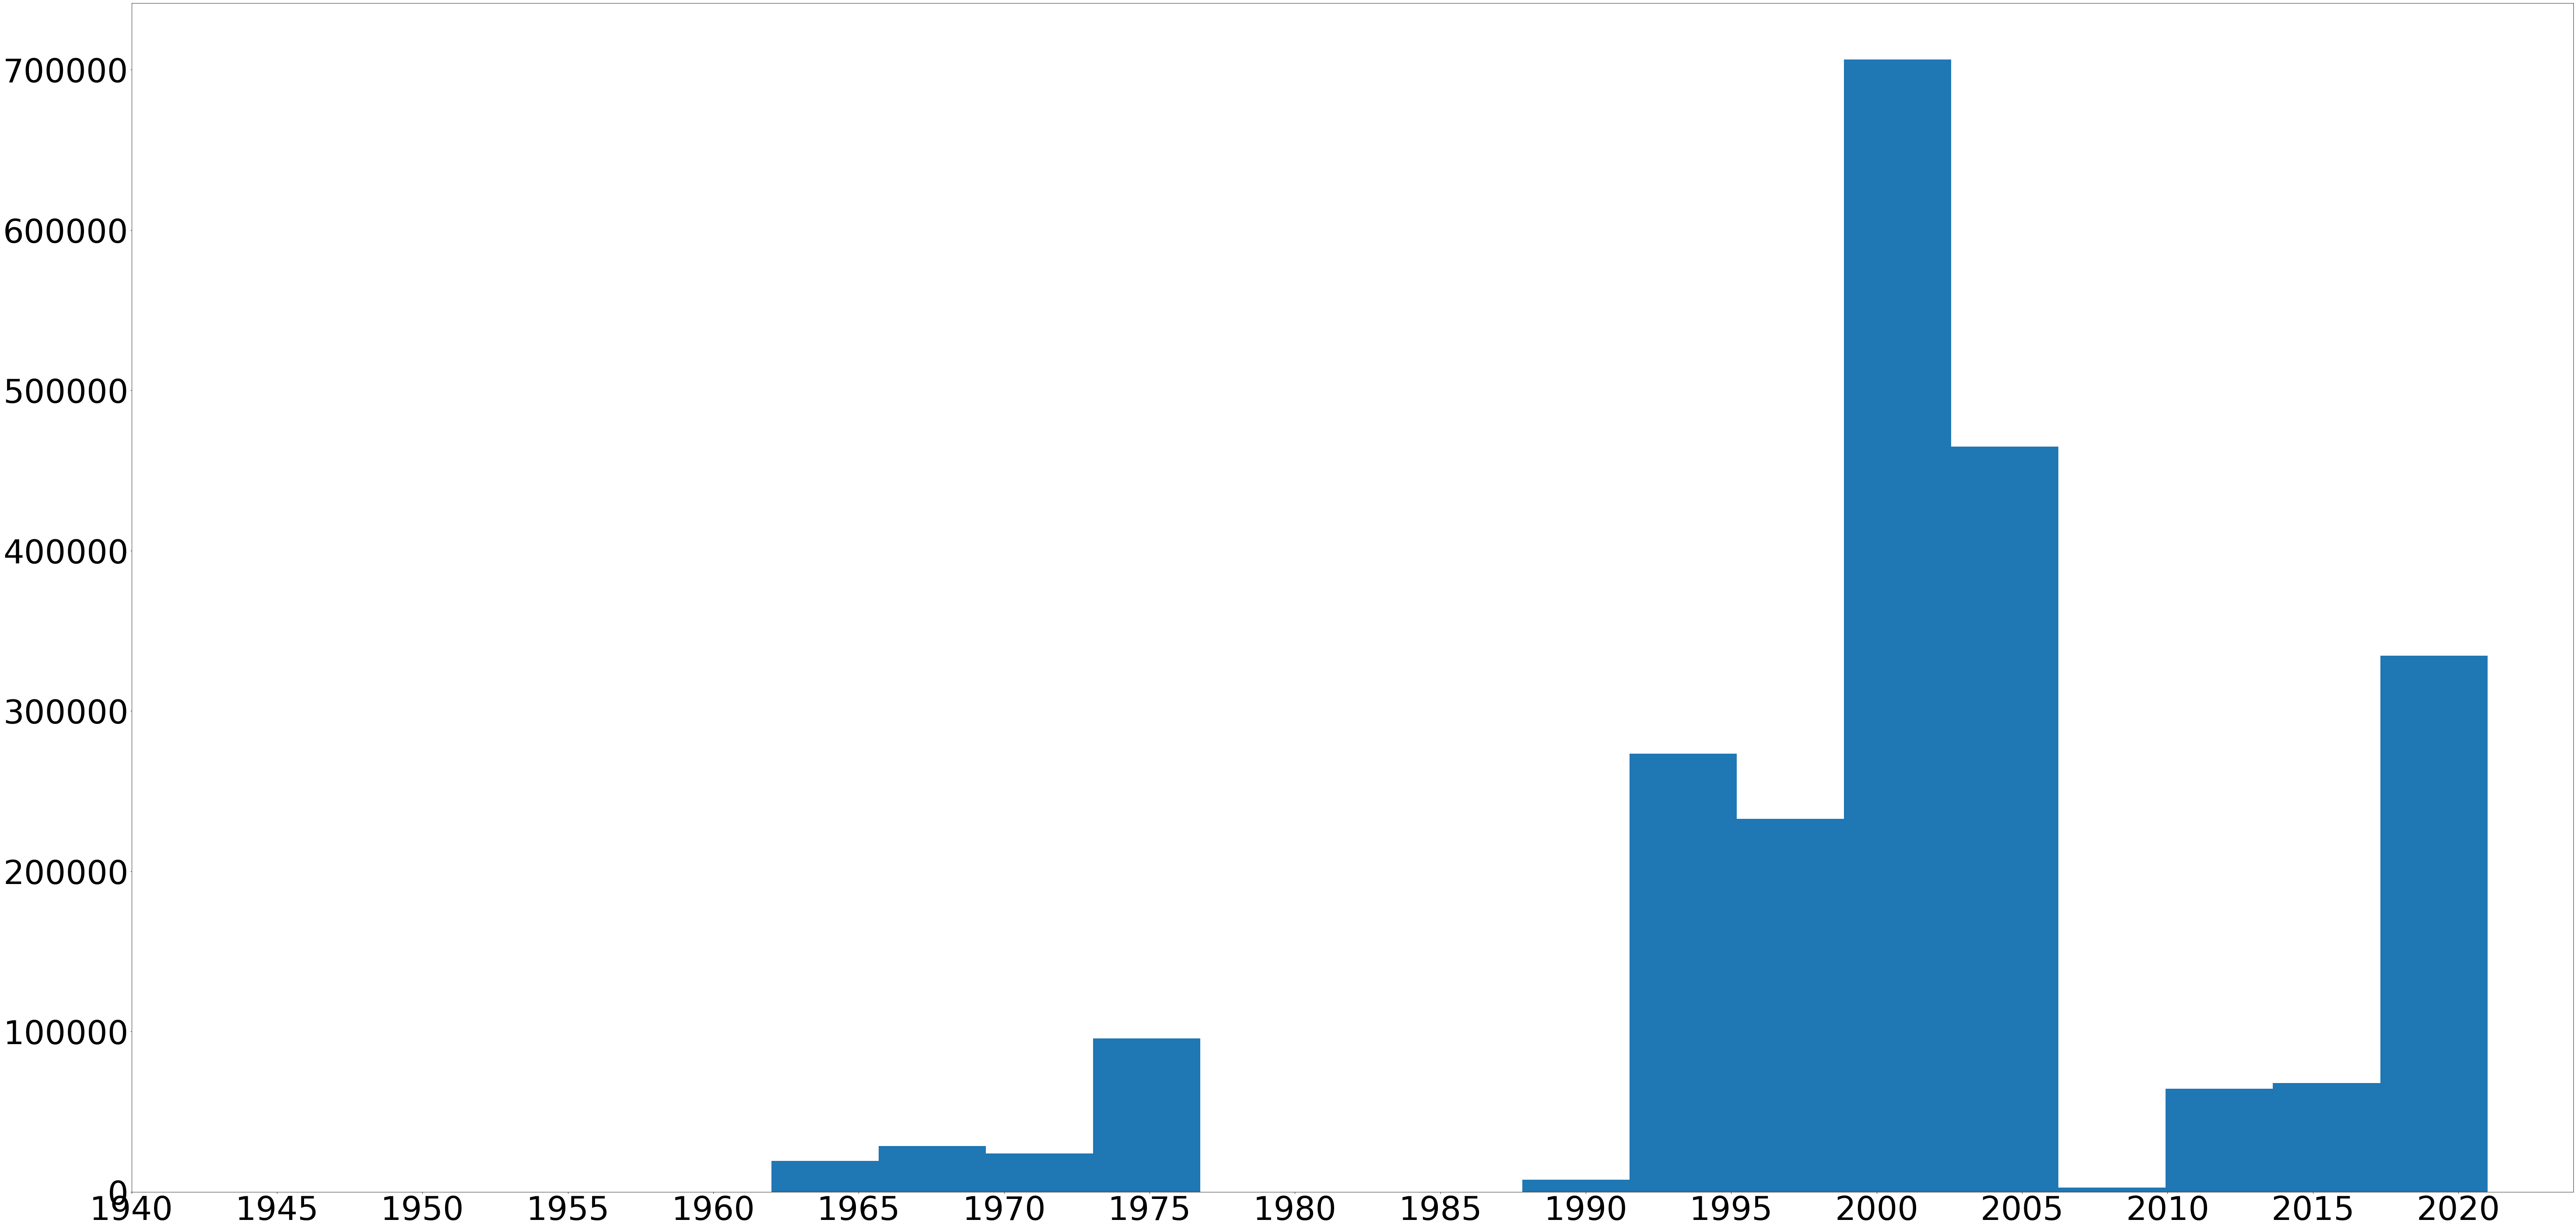

In [11]:
plt.figure(figsize=(100,50))
plt.hist(df["release_year"], bins = 16)
plt.tick_params(axis='both', which='major', labelsize=75)
plt.xticks([i for i in range(1940, 2021, 5)])
plt.show()

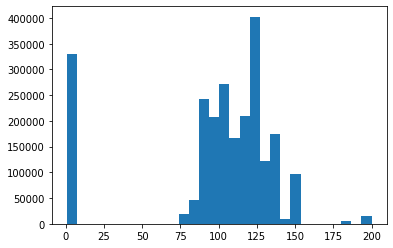

In [12]:
plt.hist(df["duration"], bins=30, )
plt.show()

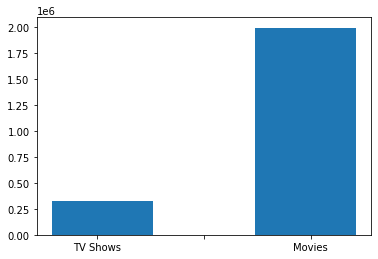

2321442

In [13]:
plt.hist(df["is_movie"], bins=3)
plt.xticks([0.15, 0.5, 0.85], ["TV Shows", '', "Movies"])
plt.show()

df.is_movie.count()

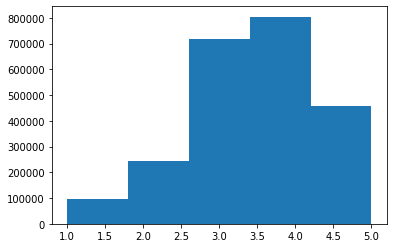

In [14]:
plt.hist(df["user_rating"], bins=5)
plt.show()

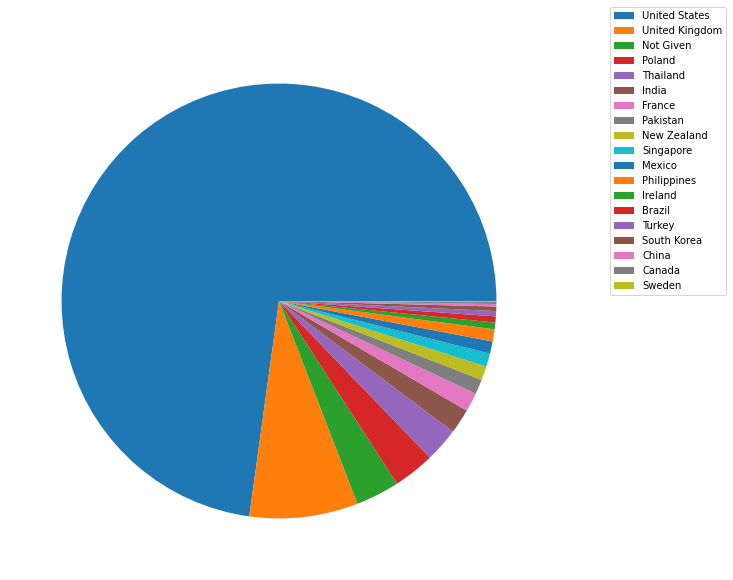

In [15]:
country_count = df.groupby("country").count().sort_values("title", ascending=False)
plt.figure(figsize=(10,10))
plt.pie(country_count["title"].iloc[0:30], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'].reverse())
ax = plt.subplot()
ax.legend(country_count['title'].iloc[0:30].index, bbox_to_anchor=(1.1, 1.05))
plt.show()


In [16]:
country_count['title'].iloc[0:30]

country
United States     1690362
United Kingdom     187217
Not Given           75482
Poland              71405
Thailand            58939
India               42697
France              32686
Pakistan            25393
New Zealand         24117
Singapore           22972
Mexico              20982
Philippines         20869
Ireland             11473
Brazil              10614
Turkey               9058
South Korea          7774
China                4297
Canada               3675
Sweden               1430
Name: title, dtype: int64

In [17]:
df_category_count = df.groupby("genres").count().sort_values("title", ascending=False)
max_30 = df_category_count["title"][0:30]
max_30

genres
Action & Adventure          652673
Comedies                    509990
Dramas                      364427
Children & Family Movies    174944
International TV Shows      168034
Classic Movies              133333
Crime TV Shows              113571
Thrillers                    77070
Horror Movies                52789
TV Dramas                    28174
Documentaries                26508
British TV Shows             14862
Kids' TV                      5067
Name: title, dtype: int64

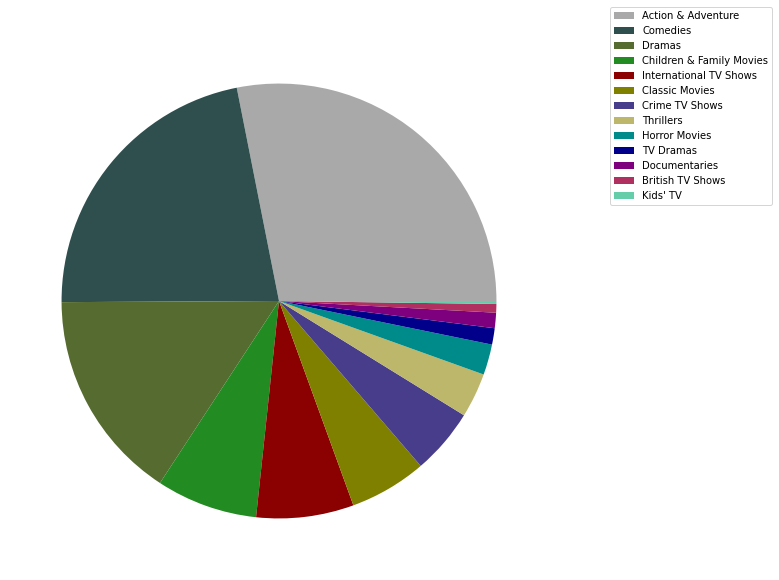

In [18]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("genres").count().sort_values("title", ascending=False)["title"], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
ax.legend(df.groupby("genres").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

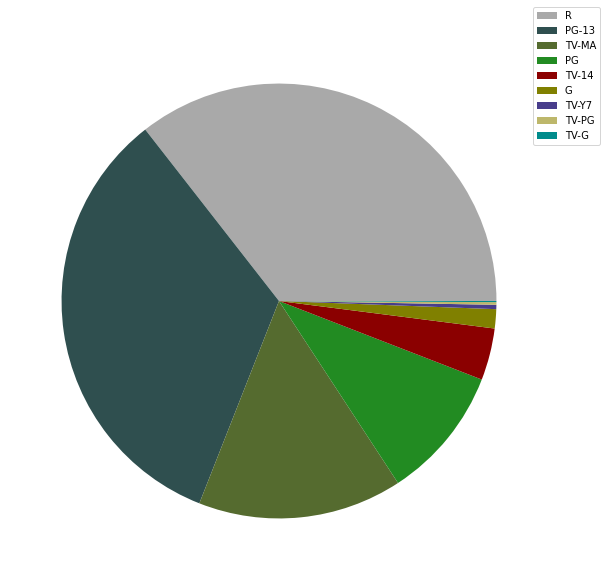

In [19]:
plt.figure(figsize=(10,10))
plt.pie(df.groupby("rating").count().sort_values("title", ascending=False)["title"], colors=['#a9a9a9', '#2f4f4f', '#556b2f', '#228b22', '#8b0000', '#808000', '#483d8b', '#bdb76b', '#008b8b', '#00008b', '#7f007f', '#b03060', '#66cdaa', '#ff4500', '#ffa500', '#ffff00', '#00ff00', '#9400d3', '#00ff7f', '#dc143c', '#00ffff', '#00bfff', '#f4a460', '#0000ff', '#adff2f', '#ff00ff', '#fa8072', '#6495ed', '#dda0dd', '#90ee90', '#ff1493', '#7b68ee', '#afeeee', '#ee82ee', '#ffe4c4', '#ffb6c1'])
ax = plt.subplot()
ax.legend(df.groupby("rating").count().sort_values("title", ascending=False).index, bbox_to_anchor=(1.1, 1.05))
plt.show()

### Correlation Heatmap

## NOTE: Elaborate more on the heatmap Daniel and Cade

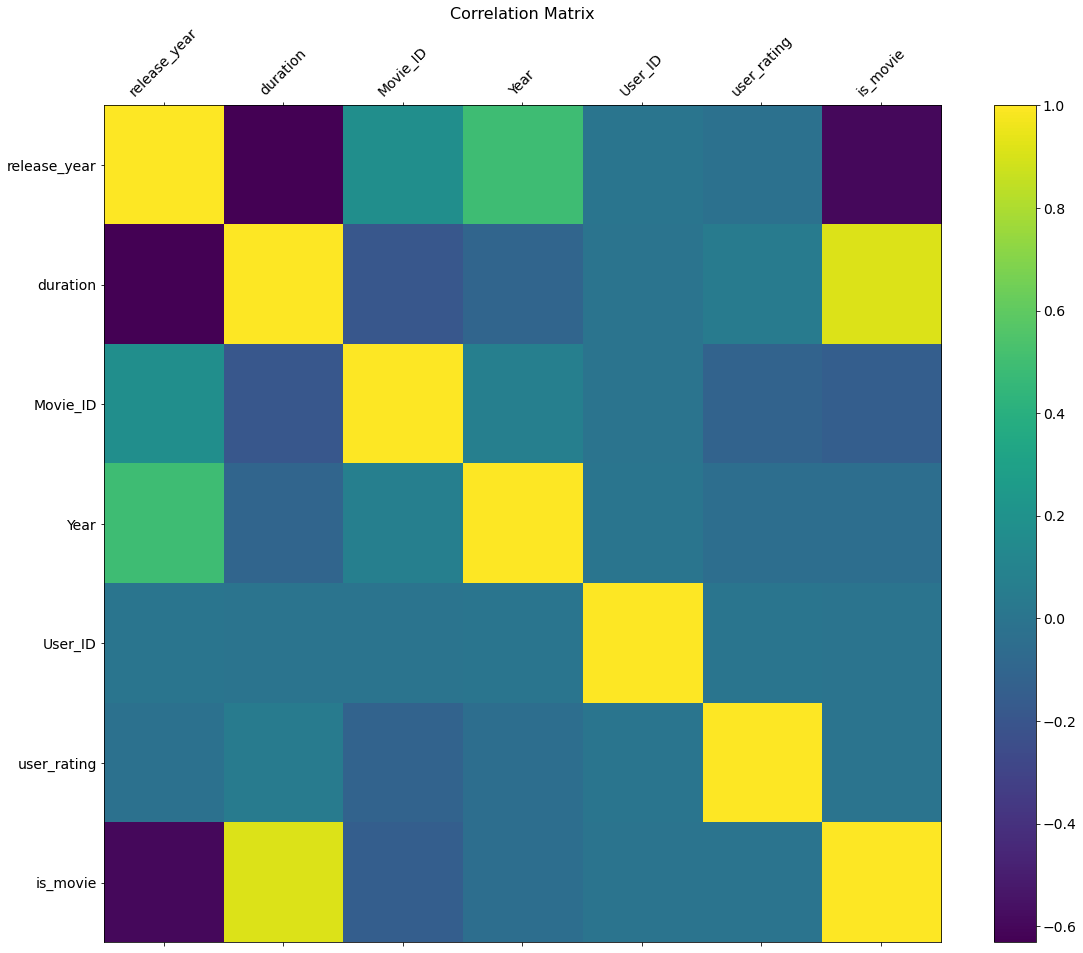

In [20]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Variables Removed

To start with we drop "show_id", "Movie_ID", "Year" from the dataframe. because show_id and movie_id are used to identify the movie but we are only going to use title. We also remove year, this is because it is a duplicate of release year.

In [21]:
df.drop(["show_id", "Movie_ID", "Year"], axis=1, inplace=True)

Next we drop "date_added", because we assume it does not corrleate with "user_rating".

In [22]:
df.drop(["date_added"], axis=1, inplace=True)

Next we drop "type" as the information has already be converted to is movie.

In [23]:
df.drop("type", axis=1, inplace=True)

Finally we remove all all rows where is_movie is equal to 0, so only movies are in our dataframe, and we drop the column is_movie because it is only true so it is redundant.

In [24]:
df = df[df["is_movie"]==1]
df.drop(["is_movie"], axis=1, inplace=True)

## Conclusion

## NOTE: Give us a conclusion Daniel and Cade

## Building the machine learning model for our recommendation system

In [25]:
df_user = df.sort_values("User_ID")

In [26]:
df_user.head()

title                 director         country  \
1789405               S.W.A.T.            Clark Johnson   United States   
482780                Stargate          Roland Emmerich   United States   
877418             About a Boy  Chris Weitz, Paul Weitz  United Kingdom   
2022279  The Amityville Horror           Andrew Douglas   United States   
1729155        Rosemary's Baby           Roman Polanski   United States   

         release_year rating  duration  \
1789405          2003  PG-13       117   
482780           1994  PG-13       121   
877418           2002  PG-13       101   
2022279          2005      R        89   
1729155          1968      R       137   

                                        listed_in  User_ID  user_rating  \
1789405                        Action & Adventure        6            1   
482780       Action & Adventure, Sci-Fi & Fantasy        6            2   
877418     Comedies, Dramas, International Movies        6            3   
2022279                             Horror Movies        6            3   
1729155  Classic Movies, Horror Movies, Thrillers        6            3   

                     genres  
1789405  Action & Adventure  
482780   Action & Adventure  
877418             Comedies  
2022279       Horror Movies  
1729155      Classic Movies

In [27]:
allUserIds = df_user["User_ID"].unique()
allUserIds

array([      6,       7,      79, ..., 2649388, 2649426, 2649429])

In [28]:
num_ratings_per_user = df_user.groupby("User_ID").count()

In [29]:
num_ratings_per_user

title  director  country  release_year  rating  duration  listed_in  \
User_ID                                                                        
6           18        18       18            18      18        18         18   
7           25        25       25            25      25        25         25   
79          24        24       24            24      24        24         24   
97          14        14       14            14      14        14         14   
134         27        27       27            27      27        27         27   
...        ...       ...      ...           ...     ...       ...        ...   
2649370      8         8        8             8       8         8          8   
2649378      8         8        8             8       8         8          8   
2649388      9         9        9             9       9         9          9   
2649426     12        12       12            12      12        12         12   
2649429     14        14       14            14      14        14         14   

         user_rating  genres  
User_ID                       
6                 18      18  
7                 25      25  
79                24      24  
97                14      14  
134               27      27  
...              ...     ...  
2649370            8       8  
2649378            8       8  
2649388            9       9  
2649426           12      12  
2649429           14      14  

[143331 rows x 9 columns]

In [30]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def classification_model(user_to_rate, model):
    cat_features = df_user.drop(["user_rating", "duration", "User_ID"], axis=1).columns
    x_list = ["duration"]
    for i in cat_features:
        df_user[f"{i}"] = df_user[f"{i}"].astype('category')
        df_user[f"{i}"] = df_user[f"{i}"].cat.codes
        x_list.append(i)
    df_user_id = df_user[df_user["User_ID"]==user_to_rate]
    x = df_user_id[x_list]
    y = np.array(df_user_id["user_rating"]).reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    real = np.array([i[0] for i in y_test.tolist()])
#     print("Predicted Ratings:")
#     print(prediction)
#     print("Actual Ratings: ")
#     print(real)
    return abs(mean_squared_error(np.array(prediction).reshape(-1, 1), np.array(y_test).reshape(-1, 1)))

In [31]:
print(len(allUserIds))

143331


1.5003663003663004


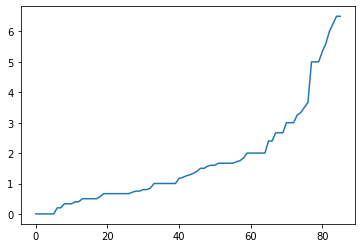

In [32]:
knn_scores = []
for i in allUserIds[0:100]:
    try:
        knn_scores.append(classification_model(i, KNeighborsClassifier()))
    except:
        pass
print(sum(knn_scores)/100)
knn_scores.sort()
plt.plot(knn_scores)

2.2330054945054947


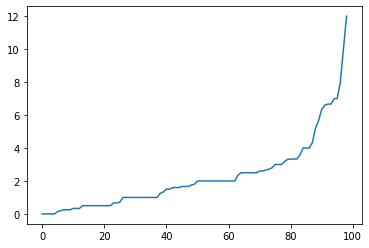

In [33]:
gaussian_process_scores = []
for i in allUserIds[0:100]:
    try:
        gaussian_process_scores.append(classification_model(i, GaussianProcessClassifier()))
    except:
        pass
print(sum(gaussian_process_scores)/100)
gaussian_process_scores.sort()
plt.plot(gaussian_process_scores)

1.9983223443223443


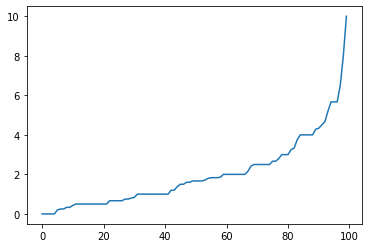

In [34]:
dtc_scores = []
for i in allUserIds[0:100]:
    try:
        dtc_scores.append(classification_model(i, DecisionTreeClassifier()))
    except:
        pass
print(sum(dtc_scores)/100)
dtc_scores.sort()
plt.plot(dtc_scores)

1.8030567765567767


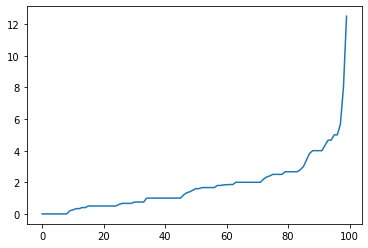

In [35]:
mlp_scores = []
for i in allUserIds[0:100]:
    try:
        mlp_scores.append(classification_model(i, MLPClassifier()))
    except:
        pass
print(sum(mlp_scores)/100)
mlp_scores.sort()
plt.plot(mlp_scores)

1.8732399267399267


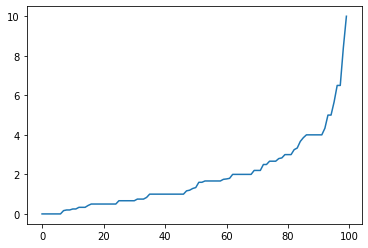

In [36]:
random_forest_scores = []
for i in allUserIds[0:100]:
    try:
        random_forest_scores.append(classification_model(i, RandomForestClassifier()))
    except:
        pass
print(sum(random_forest_scores)/100)
random_forest_scores.sort()
plt.plot(random_forest_scores)

1.6519652014652018


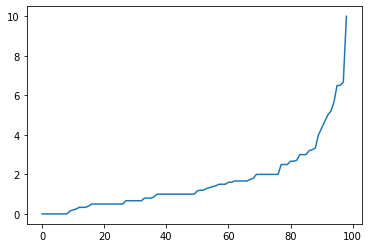

In [37]:
svc_scores = []
for i in allUserIds[0:100]:
    try:
        svc_scores.append(classification_model(i, SVC()))
    except:
        pass
print(sum(svc_scores)/100)
svc_scores.sort()
plt.plot(svc_scores)

1.5674871794871796


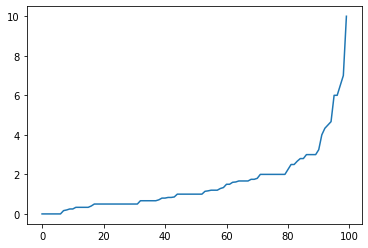

In [38]:
naive_bayes_scores = []
for i in allUserIds[0:100]:
    try:
        naive_bayes_scores.append(classification_model(i, GaussianNB()))
    except:
        pass
print(sum(naive_bayes_scores)/100)
naive_bayes_scores.sort()
plt.plot(naive_bayes_scores)